# The Vanishing Gradient and Exploding Gradients Problem

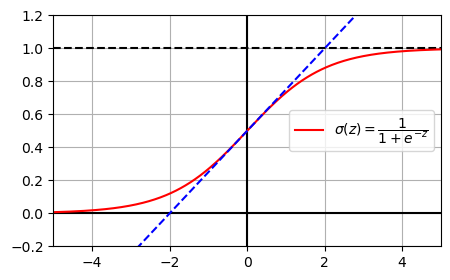

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z=np.linspace(-5,5,400)

plt.figure(figsize=(5,3))
plt.plot([-5,5],[0,0],"k-")
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot(z,sigmoid(z),"r",label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
plt.plot([-5,5],[-3/4,7/4],"b--")
plt.axis([-5,5,-0.2,1.2])
plt.legend()
plt.grid()
plt.show()

## Xavier and He Initialization

In [5]:
import tensorflow as tf

dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal")

In [6]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer=he_avg_init)

## Non-saturating Activation Functions

### ReLU

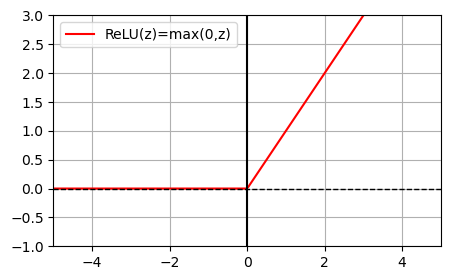

In [9]:
def relu(z):
    return np.maximum(0,z)
z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,relu(z),"r-",label="ReLU(z)=max(0,z)")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.legend()
plt.grid()
plt.show()


### Leaky ReLU

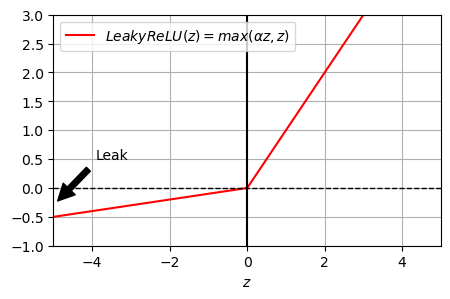

In [11]:
def leaky_relu(z,alpha):
    return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,leaky_relu(z,0.1),"r-",label=r"$LeakyReLU(z)=max(\alpha z,z)$")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=dict(color="black",shrink=0.1),
             fontsize=10, ha="center")
plt.xlabel("$z$")
plt.legend()
plt.grid()
plt.show()


In [12]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense=tf.keras.layers.Dense(100,activation=leaky_relu,kernel_initializer="he_normal")

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1)
])

### ELU

In [15]:
dense=tf.keras.layers.Dense(200,activation="elu",
                           kernel_initializer="he_normal")

### SELU

In [17]:
dense=tf.keras.layers.Dense(200,activation="selu",
                           kernel_initializer="lecun_normal")


In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [20]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[5000:],y_train_full[5000:]
X_valid,y_valid=X_train_full[:5000],y_train_full[:5000]
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [23]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4445 - loss: 1.4621 - val_accuracy: 0.6970 - val_loss: 0.8074
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6935 - loss: 0.8277 - val_accuracy: 0.7708 - val_loss: 0.6415
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7543 - loss: 0.6691 - val_accuracy: 0.6756 - val_loss: 0.9056
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6818 - loss: 0.8758 - val_accuracy: 0.7820 - val_loss: 0.6323
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7813 - loss: 0.6159 - val_accuracy: 0.7728 - val_loss: 0.6159


In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [25]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [27]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1279 - loss: 2.2271 - val_accuracy: 0.2902 - val_loss: 1.5202
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3880 - loss: 1.4205 - val_accuracy: 0.5640 - val_loss: 1.0387
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4817 - loss: 1.2203 - val_accuracy: 0.5632 - val_loss: 1.0643
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6176 - loss: 0.9195 - val_accuracy: 0.6692 - val_loss: 0.8324
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6549 - loss: 0.8444 - val_accuracy: 0.6200 - val_loss: 0.9464


## Batch Normalization 

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [32]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [34]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5952 - loss: 1.2441 - val_accuracy: 0.8030 - val_loss: 0.5878
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7883 - loss: 0.6273 - val_accuracy: 0.8294 - val_loss: 0.4997
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8137 - loss: 0.5458 - val_accuracy: 0.8404 - val_loss: 0.4598
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8288 - loss: 0.5031 - val_accuracy: 0.8494 - val_loss: 0.4361
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8378 - loss: 0.4747 - val_accuracy: 0.8554 - val_loss: 0.4200


In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [36]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [38]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.5101 - loss: 1.4931 - val_accuracy: 0.7628 - val_loss: 0.7374
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.7583 - loss: 0.7571 - val_accuracy: 0.8016 - val_loss: 0.6055
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.7872 - loss: 0.6460 - val_accuracy: 0.8174 - val_loss: 0.5432
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8040 - loss: 0.5863 - val_accuracy: 0.8296 - val_loss: 0.5045
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8160 - loss: 0.5466 - val_accuracy: 0.8414 - val_loss: 0.4774


In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [42]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.5104 - loss: 1.5309 - val_accuracy: 0.7764 - val_loss: 0.7334
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.7632 - loss: 0.7541 - val_accuracy: 0.8104 - val_loss: 0.6028
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.7930 - loss: 0.6389 - val_accuracy: 0.8262 - val_loss: 0.5425
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.8087 - loss: 0.5800 - val_accuracy: 0.8354 - val_loss: 0.5057
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8193 - loss: 0.5420 - val_accuracy: 0.8432 - val_loss: 0.4802


## Gradient Clipping

In [44]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer)

In [45]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1)
model.compile(loss="sparse_categorical_crossentropy")

## Reusing Pretrained Models

In [47]:
pos_class_id=class_names.index('Pullover')
neg_class_id=class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y==pos_class_id )|(y==neg_class_id)
    y_A = y[~y_for_B]
    y_B=(y[y_for_B]==pos_class_id).astype(np.float32)
    old_class_ids=list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A==old_class_id]=new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))
      

In [48]:
(X_train_A,y_train_A),(X_train_B,y_train_B)=split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B)=split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B)=split_dataset(X_test,y_test)

X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

##### Train model_A

In [50]:
tf.random.set_seed(42)

model_A=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8,activation="softmax")

])

model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_A.fit(X_train_A,y_train_A,
                   epochs=20,
                   validation_data=(X_valid_A,y_valid_A))
model_A.save("model_A.keras")

Epoch 1/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.4962 - loss: 1.5317 - val_accuracy: 0.7673 - val_loss: 0.7192
Epoch 2/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7864 - loss: 0.6621 - val_accuracy: 0.8252 - val_loss: 0.5366
Epoch 3/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.8379 - loss: 0.5136 - val_accuracy: 0.8487 - val_loss: 0.4554
Epoch 4/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8588 - loss: 0.4425 - val_accuracy: 0.8653 - val_loss: 0.4061
Epoch 5/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8697 - loss: 0.3988 - val_accuracy: 0.8789 - val_loss: 0.3727
Epoch 6/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8767 - loss: 0.3691 - val_accuracy: 0.8831 - val_loss: 0.3486
Epoch 7/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8816 - loss: 0.3476 - val_accuracy: 0.8906 - val_loss: 0.3307
Epoch 8/20
1374/1374 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8854 -

##### Train model_B without reusing model_A

In [52]:
tf.random.set_seed(42)

model_B=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

model_B.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
               metrics=["accuracy"])
history=model_B.fit(X_train_B,y_train_B,
                   epochs=20,
                   validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5004 - loss: 0.8720 - val_accuracy: 0.4079 - val_loss: 0.8083
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4564 - loss: 0.7706 - val_accuracy: 0.4152 - val_loss: 0.7308
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5104 - loss: 0.7096 - val_accuracy: 0.5879 - val_loss: 0.6805
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6235 - loss: 0.6687 - val_accuracy: 0.6816 - val_loss: 0.6437
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6894 - loss: 0.6377 - val_accuracy: 0.7305 - val_loss: 0.6132
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7626 - loss: 0.6110 - val_accuracy: 0.7804 - val_loss: 0.5863
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7883 - loss: 0.5871 - val_accuracy: 0.8325 - val_loss: 0.5621
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8260 - loss: 0.5654 - val_accuracy: 0.8616 - val_loss: 0.5399
Epoch 9

[0.3887132406234741, 0.9309999942779541]

##### Train model_B using model_A

In [54]:
tf.random.set_seed(42)

In [55]:
model_A=tf.keras.models.load_model("model_A.keras")
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [56]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [57]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [58]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=5,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5245 - loss: 0.8468 - val_accuracy: 0.6150 - val_loss: 0.6363
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6460 - loss: 0.6336 - val_accuracy: 0.7430 - val_loss: 0.5779
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6911 - loss: 0.5983 - val_accuracy: 0.7284 - val_loss: 0.5613
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7000 - loss: 0.5870 - val_accuracy: 0.7451 - val_loss: 0.5506
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7274 - loss: 0.5782 - val_accuracy: 0.7565 - val_loss: 0.5412


In [59]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True

model_B_on_A.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])


In [60]:
history=model_B_on_A.fit(X_train_B,y_train_B,
                        epochs=15,
                        validation_data=(X_valid_B,y_valid_B))

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7324 - loss: 0.5591 - val_accuracy: 0.8429 - val_loss: 0.4833
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7974 - loss: 0.5066 - val_accuracy: 0.8918 - val_loss: 0.4377
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8348 - loss: 0.4657 - val_accuracy: 0.9126 - val_loss: 0.4016
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8500 - loss: 0.4329 - val_accuracy: 0.9230 - val_loss: 0.3728
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8582 - loss: 0.4062 - val_accuracy: 0.9324 - val_loss: 0.3491
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9015 - loss: 0.3847 - val_accuracy: 0.9344 - val_loss: 0.3296
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9103 - loss: 0.3668 - val_accuracy: 0.9376 - val_loss: 0.3131
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9122 - loss: 0.3515 - val_accuracy: 0.9376 - val_loss: 0.2991
Epoch 9

In [61]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9394 - loss: 0.2523


[0.25582367181777954, 0.9399999976158142]

In [62]:
1-(100-92.60)/(100-89.25)

0.3116279069767437

# Faster Optimizers

In [64]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=[28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10,activation="softmax")
    ])
    
def build_and_train_model(optimizer):
    model=build_model()
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_valid,y_valid))   

In [65]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)

In [66]:
history_sgd=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.4289 - loss: 1.8185 - val_accuracy: 0.7088 - val_loss: 0.8755
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7238 - loss: 0.8253 - val_accuracy: 0.7722 - val_loss: 0.6823
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7668 - loss: 0.6770 - val_accuracy: 0.7982 - val_loss: 0.6067
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7933 - loss: 0.6090 - val_accuracy: 0.8090 - val_loss: 0.5621
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8063 - loss: 0.5667 - val_accuracy: 0.8204 - val_loss: 0.5328
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8149 - loss: 0.5380 - val_accuracy: 0.8260 - val_loss: 0.5119
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8204 - loss: 0.5169 - val_accuracy: 0.8328 - val_loss: 0.4958
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8264 -

## Momentum Optimization

In [68]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

In [69]:
history_momentum=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.6748 - loss: 0.9770 - val_accuracy: 0.8330 - val_loss: 0.4828
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.8302 - loss: 0.4801 - val_accuracy: 0.8506 - val_loss: 0.4234
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8476 - loss: 0.4302 - val_accuracy: 0.8566 - val_loss: 0.3945
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.8579 - loss: 0.3991 - val_accuracy: 0.8634 - val_loss: 0.3781
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8654 - loss: 0.3777 - val_accuracy: 0.8684 - val_loss: 0.3638
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.8709 - loss: 0.3604 - val_accuracy: 0.8728 - val_loss: 0.3533
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8760 - loss: 0.3468 - val_accuracy: 0.8740 - val_loss: 0.3457
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.8796 -

## Nesterov Accelerated Gradients

In [71]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,
                                 nesterov=True)

In [72]:
history_nesterov=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.6817 - loss: 0.9702 - val_accuracy: 0.8368 - val_loss: 0.4708
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.8334 - loss: 0.4696 - val_accuracy: 0.8558 - val_loss: 0.4180
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8508 - loss: 0.4225 - val_accuracy: 0.8652 - val_loss: 0.3895
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.8593 - loss: 0.3952 - val_accuracy: 0.8704 - val_loss: 0.3713
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8666 - loss: 0.3760 - val_accuracy: 0.8746 - val_loss: 0.3574
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8702 - loss: 0.3610 - val_accuracy: 0.8772 - val_loss: 0.3481
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.8743 - loss: 0.3485 - val_accuracy: 0.8786 - val_loss: 0.3419
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8788 -

## AdaGrad

In [74]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [75]:
history_adagrad=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - accuracy: 0.5214 - loss: 1.4797 - val_accuracy: 0.7742 - val_loss: 0.7028
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.7807 - loss: 0.6759 - val_accuracy: 0.8092 - val_loss: 0.5931
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.8026 - loss: 0.5884 - val_accuracy: 0.8254 - val_loss: 0.5442
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8135 - loss: 0.5454 - val_accuracy: 0.8330 - val_loss: 0.5149
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8233 - loss: 0.5187 - val_accuracy: 0.8380 - val_loss: 0.4950
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8294 - loss: 0.5001 - val_accuracy: 0.8414 - val_loss: 0.4804
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8333 - loss: 0.4859 - val_accuracy: 0.8458 - val_loss: 0.4689
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8367 -

## RMSProp

In [77]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [78]:
history_rmsprop=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.7653 - loss: 0.6418 - val_accuracy: 0.8310 - val_loss: 0.4822
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8519 - loss: 0.4029 - val_accuracy: 0.8512 - val_loss: 0.4503
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8683 - loss: 0.3702 - val_accuracy: 0.8550 - val_loss: 0.4241
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8748 - loss: 0.3554 - val_accuracy: 0.8684 - val_loss: 0.3929
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8785 - loss: 0.3467 - val_accuracy: 0.8600 - val_loss: 0.4401
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8809 - loss: 0.3400 - val_accuracy: 0.8564 - val_loss: 0.4835
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8803 - loss: 0.3400 - val_accuracy: 0.8470 - val_loss: 0.5870
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8826 -

## Adam Optimization

In [80]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [81]:
history_adam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.7683 - loss: 0.6458 - val_accuracy: 0.8700 - val_loss: 0.3681
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8552 - loss: 0.3926 - val_accuracy: 0.8778 - val_loss: 0.3365
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8702 - loss: 0.3497 - val_accuracy: 0.8752 - val_loss: 0.3480
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8811 - loss: 0.3206 - val_accuracy: 0.8842 - val_loss: 0.3314
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8878 - loss: 0.3050 - val_accuracy: 0.8860 - val_loss: 0.3253
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8936 - loss: 0.2856 - val_accuracy: 0.8920 - val_loss: 0.3179
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.8986 - loss: 0.2717 - val_accuracy: 0.8830 - val_loss: 0.3446
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.9017 -

### Adamax optimization

In [83]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [84]:
history_adamax=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.7631 - loss: 0.6790 - val_accuracy: 0.8640 - val_loss: 0.3824
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.8543 - loss: 0.3989 - val_accuracy: 0.8728 - val_loss: 0.3446
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8703 - loss: 0.3529 - val_accuracy: 0.8836 - val_loss: 0.3259
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8799 - loss: 0.3270 - val_accuracy: 0.8848 - val_loss: 0.3143
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8885 - loss: 0.3046 - val_accuracy: 0.8868 - val_loss: 0.3158
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8935 - loss: 0.2890 - val_accuracy: 0.8852 - val_loss: 0.3144
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.8990 - loss: 0.2749 - val_accuracy: 0.8876 - val_loss: 0.3180
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.9038 -

### Nadam Optimizer

In [86]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [87]:
history_nadam=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7780 - loss: 0.6311 - val_accuracy: 0.8702 - val_loss: 0.3579
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3773 - val_accuracy: 0.8758 - val_loss: 0.3406
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3379 - val_accuracy: 0.8816 - val_loss: 0.3368
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8842 - loss: 0.3140 - val_accuracy: 0.8780 - val_loss: 0.3371
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8912 - loss: 0.2938 - val_accuracy: 0.8866 - val_loss: 0.3164
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8971 - loss: 0.2791 - val_accuracy: 0.8864 - val_loss: 0.3166
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2662 - val_accuracy: 0.8764 - val_loss: 0.3412
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9050 - loss: 0.2545 - 

### AdamW Optimizer

In [89]:
optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001,weight_decay=1e-5,
                                   beta_1=0.9,beta_2=0.99)

In [90]:
history_adamw=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.7731 - loss: 0.6501 - val_accuracy: 0.8598 - val_loss: 0.3854
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.8567 - loss: 0.3879 - val_accuracy: 0.8752 - val_loss: 0.3428
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.8731 - loss: 0.3427 - val_accuracy: 0.8840 - val_loss: 0.3241
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8835 - loss: 0.3138 - val_accuracy: 0.8786 - val_loss: 0.3437
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.8899 - loss: 0.2975 - val_accuracy: 0.8814 - val_loss: 0.3352
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.8992 - loss: 0.2773 - val_accuracy: 0.8870 - val_loss: 0.3338
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.9006 - loss: 0.2667 - val_accuracy: 0.8874 - val_loss: 0.3320
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.9036 - l

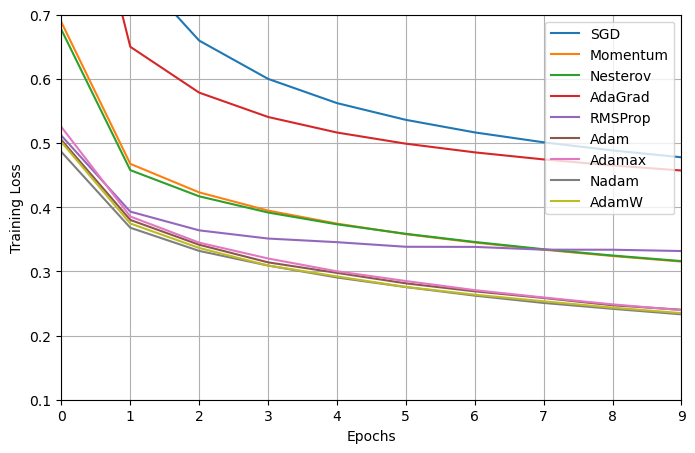

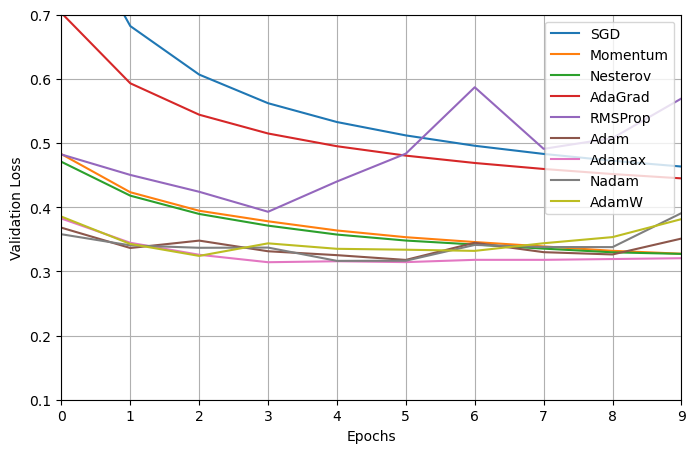

In [91]:
for loss in ("loss","val_loss"):
    plt.figure(figsize=(8, 5))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history,opt_name in zip((history_sgd,history_momentum,history_nesterov,history_adagrad,
                                history_rmsprop,history_adam,history_adamax,history_nadam,
                                history_adamw),opt_names.split()):
        plt.plot(history.history[loss],label=f"{opt_name}")

    plt.grid()
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel({"loss":"Training Loss","val_loss":"Validation Loss"}[loss])
    plt.axis([0, 9, 0.1, 0.7])
    plt.show
        
    

## Learning Rate Scheduling

## Power Scheduling

In [94]:
lr_schedule=tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=1,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [95]:
history_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.6746 - loss: 0.9675 - val_accuracy: 0.8174 - val_loss: 0.5278
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.8259 - loss: 0.4876 - val_accuracy: 0.8446 - val_loss: 0.4480
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8452 - loss: 0.4340 - val_accuracy: 0.8546 - val_loss: 0.4155
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8550 - loss: 0.4055 - val_accuracy: 0.8608 - val_loss: 0.3951
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.8616 - loss: 0.3863 - val_accuracy: 0.8650 - val_loss: 0.3813
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8664 - loss: 0.3720 - val_accuracy: 0.8678 - val_loss: 0.3719
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.8710 - loss: 0.3607 - val_accuracy: 0.8686 - val_loss: 0.3647
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8739 -

In [96]:
optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule,beta_1=0.9,beta_2=0.999)

In [97]:
history_adam_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.7406 - loss: 0.7267 - val_accuracy: 0.8510 - val_loss: 0.4171
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.8348 - loss: 0.4607 - val_accuracy: 0.8610 - val_loss: 0.4047
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.8463 - loss: 0.4251 - val_accuracy: 0.8584 - val_loss: 0.4129
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8566 - loss: 0.3951 - val_accuracy: 0.8678 - val_loss: 0.3846
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8613 - loss: 0.3796 - val_accuracy: 0.8654 - val_loss: 0.3758
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.8682 - loss: 0.3615 - val_accuracy: 0.8722 - val_loss: 0.3787
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8696 - loss: 0.3477 - val_accuracy: 0.8700 - val_loss: 0.3738
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8759 -

In [98]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [99]:
history_adamax_power_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.7636 - loss: 0.6843 - val_accuracy: 0.8656 - val_loss: 0.3837
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.8559 - loss: 0.3960 - val_accuracy: 0.8762 - val_loss: 0.3495
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8701 - loss: 0.3518 - val_accuracy: 0.8796 - val_loss: 0.3362
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.8808 - loss: 0.3257 - val_accuracy: 0.8780 - val_loss: 0.3337
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8867 - loss: 0.3068 - val_accuracy: 0.8762 - val_loss: 0.3350
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8931 - loss: 0.2908 - val_accuracy: 0.8812 - val_loss: 0.3295
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8994 - loss: 0.2770 - val_accuracy: 0.8832 - val_loss: 0.3265
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.9027 -

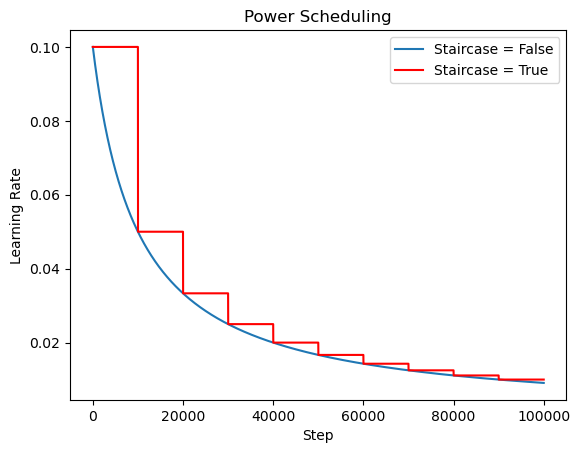

In [100]:
initial_learning_rate=0.1
decay_steps=10000
decay_rate=1

steps=np.arange(100000)
lrs=initial_learning_rate/(1+decay_rate*steps/decay_steps)
lrs2=initial_learning_rate/(1+decay_rate*np.floor(steps/decay_steps))

plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"r-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling")
plt.legend()
plt.show()

## Exponential Scheduling

In [102]:
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_rate=0.1,
    decay_steps=20000,
    staircase=False
)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [103]:
history_exponential_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.6810 - loss: 0.9481 - val_accuracy: 0.8228 - val_loss: 0.5071
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8264 - loss: 0.4921 - val_accuracy: 0.8494 - val_loss: 0.4406
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.8444 - loss: 0.4415 - val_accuracy: 0.8562 - val_loss: 0.4118
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8533 - loss: 0.4138 - val_accuracy: 0.8624 - val_loss: 0.3954
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8589 - loss: 0.3957 - val_accuracy: 0.8632 - val_loss: 0.3848
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8636 - loss: 0.3825 - val_accuracy: 0.8660 - val_loss: 0.3771
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8671 - loss: 0.3728 - val_accuracy: 0.8688 - val_loss: 0.3714
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8704 -

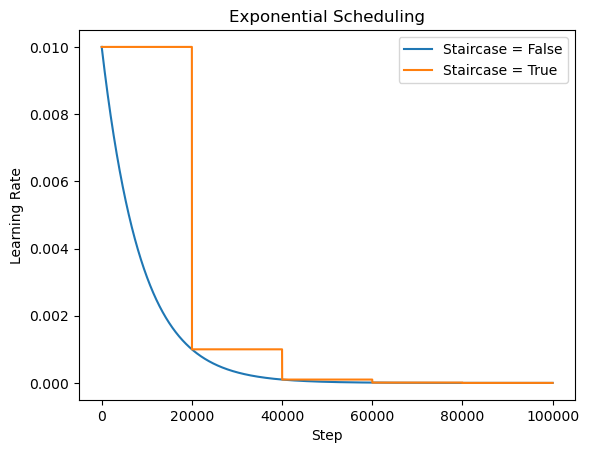

In [104]:
initial_learning_rate=0.01
decay_steps=20000
decay_rate=0.1

steps=np.arange(100000)
lrs=initial_learning_rate*decay_rate**(steps/decay_steps)
lrs2=initial_learning_rate*decay_rate**np.floor(steps/decay_steps)
plt.plot(steps,lrs,"-",label="Staircase = False")
plt.plot(steps,lrs2,"-",label="Staircase = True")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling")
plt.legend()
plt.show()

In [105]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn=exponential_decay(lr0=0.01,s=20)

In [106]:
tf.random.set_seed(42)

model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [107]:
lr_scheduler_cb=tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history=model.fit(X_train,y_train,
                 epochs=20,
                 validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler_cb])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.6750 - loss: 0.9831 - val_accuracy: 0.8216 - val_loss: 0.5291 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8315 - loss: 0.4773 - val_accuracy: 0.8470 - val_loss: 0.4465 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8493 - loss: 0.4257 - val_accuracy: 0.8582 - val_loss: 0.4090 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8595 - loss: 0.3973 - val_accuracy: 0.8642 - val_loss: 0.3876 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8652 - loss: 0.3778 - val_accuracy: 0.8682 - val_loss: 0.3726 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8700 - loss: 0.3633 - val_accuracy: 0.8710 - val_loss: 0.3620 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accura

In [108]:
class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,initial_lr,decay_rate,decay_steps):
        super().__init__()
        self.initial_lr=initial_lr
        self.decay_rate=decay_rate
        self.decay_steps=decay_steps
        self.step=0

    def on_batch_begin(self,batch,logs=None):
        self.step+=1
        new_lr=self.initial_lr*(self.decay_rate**(self.step/self.decay_steps))
        self.model.optimizer.learning_rate.assign(new_lr)
    def on_epoch_end(self,epoch,logs=None):
        logs=logs or {}
        logs['lr']=self.model.optimizer.learning_rate.numpy()

In [109]:
import math

lr0=0.01
model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [110]:
batch_size=32
n_epochs=20
decay_steps=n_epochs*math.ceil(len(X_train)/batch_size)
exp_decay=ExponentialDecay(initial_lr=lr0,decay_rate=0.1,decay_steps=decay_steps)

In [111]:
history=model.fit(
    X_train,y_train,
    epochs=n_epochs,
    validation_data=(X_valid,y_valid),
    callbacks=[exp_decay]
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.6846 - loss: 0.9524 - val_accuracy: 0.8256 - val_loss: 0.5070 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8301 - loss: 0.4804 - val_accuracy: 0.8428 - val_loss: 0.4386 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8481 - loss: 0.4287 - val_accuracy: 0.8586 - val_loss: 0.4037 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.8586 - loss: 0.4000 - val_accuracy: 0.8660 - val_loss: 0.3844 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.8645 - loss: 0.3809 - val_accuracy: 0.8686 - val_loss: 0.3718 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.8692 - loss: 0.3669 - val_accuracy: 0.8734 - val_loss: 0.3621 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8730 - loss: 0.3558 - val_accuracy: 0.8756 - val_loss: 0.355

## Piecewise Constant Scheduling

In [113]:
lr_schedule=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[20_000,40_000],
    values=[0.01,0.005,0.001]  
)

optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [114]:
history_picewise_scheduling=build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.6853 - loss: 0.9477 - val_accuracy: 0.8136 - val_loss: 0.5339
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8270 - loss: 0.4823 - val_accuracy: 0.8410 - val_loss: 0.4591
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8447 - loss: 0.4313 - val_accuracy: 0.8544 - val_loss: 0.4172
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8557 - loss: 0.4001 - val_accuracy: 0.8602 - val_loss: 0.3985
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8636 - loss: 0.3782 - val_accuracy: 0.8634 - val_loss: 0.3880
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8696 - loss: 0.3610 - val_accuracy: 0.8668 - val_loss: 0.3776
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8744 - loss: 0.3472 - val_accuracy: 0.8670 - val_loss: 0.3664
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8778 -

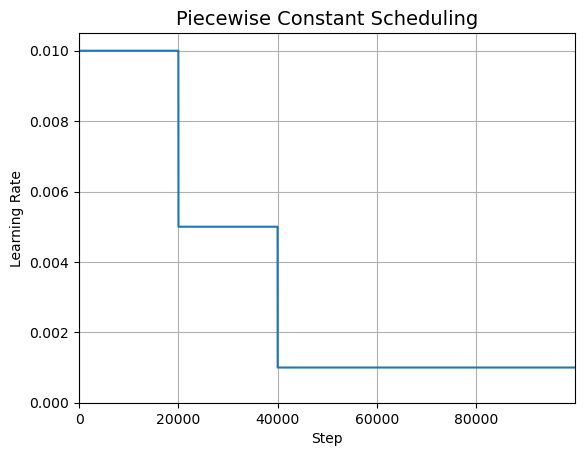

In [115]:
boundary=[20_000,40_000]
values=[0.01,0.005,0.001]  
steps=np.arange(100000)
lrs=np.full(len(steps),values[0])
for boundary, value in zip(boundary, values[1:]):
    lrs[boundary:] = value

plt.plot(steps,lrs,"-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()


In [116]:
def piecewise_constants(boundaries,values):
    boundary=np.array([0]+boundaries)
    values=np.array(values)
    def piecewise_constants_fn(epoch):
        return values[(boundary>epoch).argmax()-1]
    return piecewise_constants_fn


In [117]:
piecewise_constants_fn=piecewise_constants([5, 15], [0.01, 0.005, 0.001])


In [118]:
lr_shedule_cb=tf.keras.callbacks.LearningRateScheduler(piecewise_constants)

model=build_model()
optimizer=tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [119]:
history=model.fit(X_train,y_train,
                 epochs=25,
                 validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler_cb])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7568 - loss: 0.6888 - val_accuracy: 0.8436 - val_loss: 0.4868 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8418 - loss: 0.4442 - val_accuracy: 0.8506 - val_loss: 0.4206 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8524 - loss: 0.4085 - val_accuracy: 0.8628 - val_loss: 0.3818 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3874 - val_accuracy: 0.8602 - val_loss: 0.3927 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8654 - loss: 0.3712 - val_accuracy: 0.8608 - val_loss: 0.3754 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3536 - val_accuracy: 0.8672 - val_loss: 0.3710 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8730 - l

## Performance Scheduling

In [121]:
model=build_model()
optimizer=tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [122]:
lr_scheduler_cb=tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=2)
history=model.fit(
    X_train,y_train,
    epochs=25,
    validation_data=(X_valid,y_valid),
    callbacks=[lr_scheduler_cb]
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.6450 - loss: 1.0496 - val_accuracy: 0.8186 - val_loss: 0.5273 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8247 - loss: 0.4934 - val_accuracy: 0.8420 - val_loss: 0.4568 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8426 - loss: 0.4376 - val_accuracy: 0.8538 - val_loss: 0.4209 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8539 - loss: 0.4072 - val_accuracy: 0.8612 - val_loss: 0.4004 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8608 - loss: 0.3852 - val_accuracy: 0.8632 - val_loss: 0.3860 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8674 - loss: 0.3679 - val_accuracy: 0.8632 - val_loss: 0.3780 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accura

## 1Cycle Scheduling

In [124]:
K = tf.keras.backend
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

In [125]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [126]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [127]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self,iterations,max_lr=1e-3,start_lr=None,
                last_lr=None,last_iterations=None):
        self.iterations=iterations
        self.max_lr=max_lr
        self.start_lr=start_lr or max_lr/10
        self.last_lr=last_lr or self.start_lr/1000
        self.last_iterations=last_iterations or iterations//10+1
        self.half_iterations=(iterations-self.last_iterations)//2
        self.iteration=0
    def _interpolate(self,iter1,iter2,lr1,lr2):
        return (lr2-lr1)*(self.iteration-iter1)/(iter2-iter1) + lr1
    def on_batch_begin(self,batch,logs):
        if self.iteration<self.half_iterations:
            lr=self._interpolate(0,self.half_iterations,self.start_lr,self.max_lr)
        elif self.iteration<2*self.half_iterations:
            lr=self._interpolate(self.half_iterations,2*self.half_iterations,self.max_lr,self.start_lr)
        else:
            lr=self._interpolate(2* self.half_iterations,self.iterations,self.start_lr,self.last_lr)
        self.iteration+=1
        self.model.optimizer.learning_rate=lr

In [128]:
model=build_model()
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"])
n_epochs=25
batch_size=128

onecycle=OneCycleScheduler(math.ceil(len(X_train)/batch_size)*n_epochs,
                          max_lr=0.1)
history=model.fit(X_train,y_train,
                 epochs=n_epochs,
                 validation_data=(X_valid,y_valid),
                 callbacks=[onecycle])


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.6756 - loss: 0.9640 - val_accuracy: 0.7562 - val_loss: 0.6868
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8288 - loss: 0.4716 - val_accuracy: 0.7546 - val_loss: 0.6755
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8451 - loss: 0.4194 - val_accuracy: 0.7990 - val_loss: 0.5448
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8638 - loss: 0.3646 - val_accuracy: 0.8694 - val_loss: 0.3505
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8854 - loss: 0.3104 - val_accuracy: 0.8846 - val_loss: 0.3082
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.8986 - loss: 0.2754 - val_accuracy: 0.8938 - val_loss: 0.2926
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7547 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.0999 - loss:

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ Regularization

In [131]:
layer=tf.keras.layers.Dense(200,activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [132]:
from functools import partial

Regularized_dense=partial(
    tf.keras.layers.Dense,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    Regularized_dense(100),
    Regularized_dense(100),
    Regularized_dense(10,activation="softmax",kernel_initializer="glorot_normal")
])

In [133]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(X_train,y_train,
         epochs=15,
         validation_data=(X_valid,y_valid))

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.6799 - loss: 4.6769 - val_accuracy: 0.8150 - val_loss: 2.8841
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8114 - loss: 2.5843 - val_accuracy: 0.8264 - val_loss: 1.8658
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.8179 - loss: 1.7255 - val_accuracy: 0.8288 - val_loss: 1.3659
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8205 - loss: 1.3015 - val_accuracy: 0.8300 - val_loss: 1.1163
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.8209 - loss: 1.0892 - val_accuracy: 0.8306 - val_loss: 0.9895
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8216 - loss: 0.9815 - val_accuracy: 0.8308 - val_loss: 0.9248
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8229 - loss: 0.9259 - val_accuracy: 0.8310 - val_loss: 0.8907
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8231 -

## Dropout

In [135]:
tf.random.set_seed(42)

In [136]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer([28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [137]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(X_train,y_train,
         epochs=10,
         validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.6823 - loss: 0.8637 - val_accuracy: 0.8310 - val_loss: 0.4509
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8081 - loss: 0.5256 - val_accuracy: 0.8472 - val_loss: 0.4092
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.8238 - loss: 0.4852 - val_accuracy: 0.8622 - val_loss: 0.3866
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8316 - loss: 0.4577 - val_accuracy: 0.8680 - val_loss: 0.3674
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8364 - loss: 0.4411 - val_accuracy: 0.8648 - val_loss: 0.3637
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8419 - loss: 0.4236 - val_accuracy: 0.8728 - val_loss: 0.3514
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8453 - loss: 0.4167 - val_accuracy: 0.8698 - val_loss: 0.3528
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.8483 -

In [138]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8839 - loss: 0.3092


[0.3088601231575012, 0.8847818374633789]

In [139]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8711 - loss: 0.3599


[0.3646550178527832, 0.8671000003814697]

## MC Dropout

In [141]:
tf.random.set_seed(42)

In [142]:
y_probas=np.stack([model(X_test,training=True)
                  for sample in range(100)])
y_proba=y_probas.mean(axis=0)

In [143]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.028, 0.   , 0.116, 0.   ,
        0.856]], dtype=float32)

In [144]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.07 , 0.   , 0.172, 0.   ,
       0.756], dtype=float32)

In [145]:
y_std=y_probas.std(axis=0)
y_std[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.2 , 0.  , 0.23],
      dtype=float32)

In [146]:
y_pred=y_proba.argmax(axis=1)
accuracy=(y_pred==y_test).sum()/len(y_test)
accuracy

0.8675

In [147]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self,inputs,training=None):
        return super().call(inputs,training=True)

In [148]:
Dropout=tf.keras.layers.Dropout
mc_model=tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer,Dropout) else layer for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [149]:
mc_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
        for sample in range(100)],axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.16, 0.  , 0.78]],
      dtype=float32)

## Max norm

In [152]:
dense=tf.keras.layers.Dense(100,activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.))

In [153]:
MaxNormDense=partial(tf.keras.layers.Dense,
                    activation="relu",
                    kernel_initializer="he_normal",
                    kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation="softmax")
])

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

history=model.fit(X_train,y_train,
                 epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7412 - loss: 0.7287 - val_accuracy: 0.8478 - val_loss: 0.4138
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8459 - loss: 0.4203 - val_accuracy: 0.8616 - val_loss: 0.3702
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8573 - loss: 0.3834 - val_accuracy: 0.8678 - val_loss: 0.3531
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8670 - loss: 0.3614 - val_accuracy: 0.8754 - val_loss: 0.3415
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8696 - loss: 0.3491 - val_accuracy: 0.8746 - val_loss: 0.3405
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8750 - loss: 0.3372 - val_accuracy: 0.8768 - val_loss: 0.3300
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.8764 - loss: 0.3319 - val_accuracy: 0.8788 - val_loss: 0.3305
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.8790 -

# Exercise

## 8.DeepLearning On CIFAR10 

In [156]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [157]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,activation="swish",
                                   kernel_initializer="he_normal"))

In [158]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [159]:
from tensorflow.keras.datasets import cifar10

(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
X_train,y_train=X_train_full[5000:],y_train_full[5000:]
X_valid,y_valid=X_train_full[:5000],y_train_full[:5000]

In [160]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

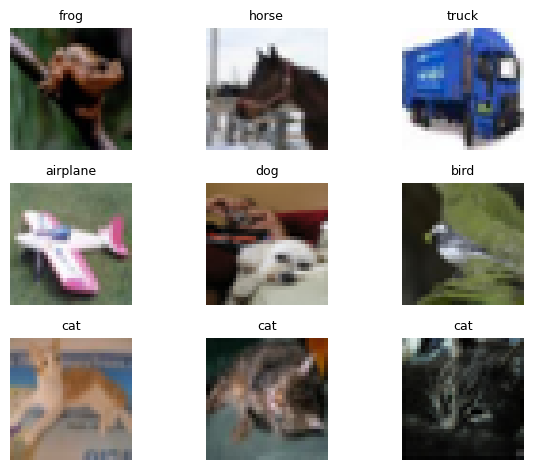

In [161]:

for image in range(9):
    plt.subplot(3,3,image+1)  
    plt.imshow(X_train[image],interpolation="nearest")
    plt.title(class_names[y_train[image][0]], fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()
    

In [162]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])


In [163]:
from pathlib import Path

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_model.keras",
                                                      save_best_only=True)
run_index=1
run_logdir=Path()/"my_cifar10_logs"/f"run_{run_index:03d}"
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)
callbacks=[early_stopping_cb,model_checkpoint_cb,tensorboard_cb]

In [164]:
%load_ext tensorboard
%tensorboard --logdir=my_cifar10_logs

In [165]:
model.fit(X_train,y_train,
         epochs=100,
         validation_data=(X_valid,y_valid),
         callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1334 - loss: 22.0614 - val_accuracy: 0.2146 - val_loss: 2.1859
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2123 - loss: 2.1592 - val_accuracy: 0.2596 - val_loss: 2.0527
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2531 - loss: 2.0342 - val_accuracy: 0.2788 - val_loss: 1.9746
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2856 - loss: 1.9561 - val_accuracy: 0.2996 - val_loss: 1.9043
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3072 - loss: 1.9005 - val_accuracy: 0.3262 - val_loss: 1.8645
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3342 - loss: 1.8346 - val_accuracy: 0.3476 - val_loss: 1.8000
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3548 - loss: 1.7827 - val_accuracy: 0.3606 - val_loss: 1.7733
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3726 - loss: 

In [166]:
model.evaluate(X_valid,y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.4323 - loss: 1.6017


[1.6046439409255981, 0.4277999997138977]

In [167]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [168]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"]
             )

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.keras",
                                                      save_best_only=True)

run_index=1
run_logdir=Path()/"my_cifar10_logs"/f"run_bn_{run_index:03d}"
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)

callbacks=[early_stopping_cb,model_checkpoint_cb,tensorboard_cb]

model.fit(X_train,y_train,
         epochs=100,
         validation_data=(X_valid,y_valid),
         callbacks=callbacks)

model.evaluate(X_valid,y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.1948 - loss: 2.1983 - val_accuracy: 0.3322 - val_loss: 1.8537
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3507 - loss: 1.7984 - val_accuracy: 0.2910 - val_loss: 1.9870
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3989 - loss: 1.6857 - val_accuracy: 0.3508 - val_loss: 1.8630
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4320 - loss: 1.6017 - val_accuracy: 0.3692 - val_loss: 1.7637
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4591 - loss: 1.5237 - val_accuracy: 0.3592 - val_loss: 1.7950
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4859 - loss: 1.4554 - val_accuracy: 0.4036 - val_loss: 1.6809
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5161 - loss: 1.3837 - val_accuracy: 0.4122 - val_loss: 1.6661
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5341 - loss: 

[1.6661417484283447, 0.412200003862381]

In [169]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100,kernel_initializer="lecun_normal",activation="selu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.Nadam(learning_rate=6e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_selu_model2.keras",
                                                      save_best_only=True)

run_index=1
run_logdir=Path()/"my_cifar10_logs"/f"run_selu2_{run_index:03d}"
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)

callbacks=[early_stopping_cb,model_checkpoint_cb,tensorboard_cb]

X_means=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train_scaled=(X_train-X_means)/X_std
X_valid_scaled=(X_valid-X_means)/X_std
X_test_scaled=(X_test-X_means)/X_std

model.fit(X_train_scaled,y_train,
         epochs=100,
         validation_data=(X_valid_scaled,y_valid),
         callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2766 - loss: 2.0239 - val_accuracy: 0.3570 - val_loss: 1.7895
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3871 - loss: 1.7182 - val_accuracy: 0.4136 - val_loss: 1.6967
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4265 - loss: 1.6192 - val_accuracy: 0.4396 - val_loss: 1.6241
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4556 - loss: 1.5455 - val_accuracy: 0.4596 - val_loss: 1.5683
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4790 - loss: 1.4941 - val_accuracy: 0.4634 - val_loss: 1.5785
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5009 - loss: 1.4361 - val_accuracy: 0.4688 - val_loss: 1.5867
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5174 - loss: 1.3928 - val_accuracy: 0.4834 - val_loss: 1.5407
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5316 - loss: 

In [170]:
model.evaluate(X_valid_scaled,y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4876 - loss: 1.5213


[1.5407010316848755, 0.48339998722076416]

In [171]:
import keras.layers

In [172]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())

for i in range(20):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.keras",
                                                      save_best_only=True)
run_index=1
run_logdir=Path()/"my_cifar10_logs"/f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)

callbacks=[early_stopping_cb,model_checkpoint_cb,tensorboard_cb]

X_means=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train_scaled=(X_train-X_means)/X_std
X_valid_scaled=(X_valid-X_means)/X_std
X_test_scaled=(X_test-X_means)/X_std

model.fit(X_train_scaled,y_train,
         epochs=100,
         validation_data=(X_valid_scaled,y_valid),
         callbacks=callbacks)
model.evaluate(X_valid_scaled,y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2678 - loss: 2.0732 - val_accuracy: 0.3852 - val_loss: 1.7778
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3941 - loss: 1.7029 - val_accuracy: 0.4360 - val_loss: 1.6338
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4349 - loss: 1.6018 - val_accuracy: 0.4606 - val_loss: 1.5892
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4645 - loss: 1.5321 - val_accuracy: 0.4624 - val_loss: 1.5916
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4893 - loss: 1.4644 - val_accuracy: 0.4806 - val_loss: 1.5266
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5079 - loss: 1.4212 - val_accuracy: 0.4828 - val_loss: 1.5532
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5241 - loss: 1.3763 - val_accuracy: 0.4900 - val_loss: 1.6143
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5424 - loss: 1

[1.5265554189682007, 0.4805999994277954]

In [173]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())

for i in range(20):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    if i%3==0:
        model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model2.keras",
                                                      save_best_only=True)
run_index=1
run_logdir=Path()/"my_cifar10_logs"/f"run_alpha_dropout2_{run_index:03d}"
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir)

callbacks=[early_stopping_cb,model_checkpoint_cb,tensorboard_cb]

X_means=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train_scaled=(X_train-X_means)/X_std
X_valid_scaled=(X_valid-X_means)/X_std
X_test_scaled=(X_test-X_means)/X_std

model.fit(X_train_scaled,y_train,
         epochs=100,
         validation_data=(X_valid_scaled,y_valid),
         callbacks=callbacks)
model.evaluate(X_valid_scaled,y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2193 - loss: 2.2024 - val_accuracy: 0.3436 - val_loss: 1.8868
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3421 - loss: 1.8263 - val_accuracy: 0.4060 - val_loss: 1.8091
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3863 - loss: 1.7231 - val_accuracy: 0.4224 - val_loss: 1.7581
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4113 - loss: 1.6634 - val_accuracy: 0.4510 - val_loss: 1.7230
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4370 - loss: 1.6163 - val_accuracy: 0.4626 - val_loss: 1.7434
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4500 - loss: 1.5655 - val_accuracy: 0.4682 - val_loss: 1.7413
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4626 - loss: 1.5345 - val_accuracy: 0.4658 - val_loss: 1.7344
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4740 - loss: 

[1.7230044603347778, 0.45100000500679016]

In [174]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self,inputs):
        return super().call(inputs,training=True)

In [175]:
mc_model=tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer,keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [176]:
def mc_dropout_predict_proba(mc_model,X,n_samples=10):
    Y_proba=[mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_proba,axis=0)

def mc_dropout_predict_classes(mc_model,X,n_samples=10):
    Y_proba=mc_dropout_predict_proba(mc_model,X,n_samples)
    return Y_proba.argmax(axis=1)

In [177]:
tf.random.set_seed(42)

y_pred=mc_dropout_predict_classes(mc_model,X_valid_scaled)
accuracy=(y_pred==y_valid[:,0]).mean()
accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.455

In [178]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())

for i in range(20):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    if i%3==0:
        model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [179]:
batch=128
rate,losses=find_learning_rate(model,X_train_scaled,y_train,epochs=1,
                              batch_size=batch_size)

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1252 - loss: nan   


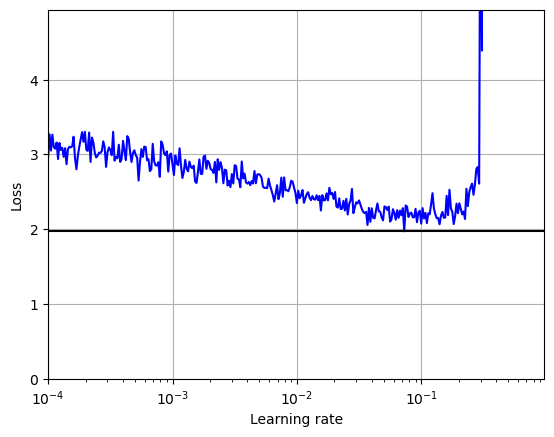

In [180]:
plot_lr_vs_loss(rate,losses)

In [181]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[32,32,3]))
model.add(tf.keras.layers.Flatten())

for i in range(20):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    if i%3==0:
        model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation="softmax"))

optimizer=tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [182]:
n_epochs=16
n_iterations=math.ceil(len(X_train_scaled)/batch_size)*n_epochs
onecycle=OneCycleScheduler(n_iterations,max_lr=0.05)

history=model.fit(X_train_scaled,y_train,
                 epochs=n_epochs,
                 batch_size=batch_size,
                 validation_data=(X_valid_scaled,y_valid),           
                 callbacks=[onecycle])


Epoch 1/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1591 - loss: 2.5234 - val_accuracy: 0.2780 - val_loss: 2.0371
Epoch 2/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2438 - loss: 2.0668 - val_accuracy: 0.3270 - val_loss: 1.9248
Epoch 3/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2890 - loss: 1.9441 - val_accuracy: 0.3600 - val_loss: 1.8640
Epoch 4/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3235 - loss: 1.8626 - val_accuracy: 0.3812 - val_loss: 1.7939
Epoch 5/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3530 - loss: 1.8024 - val_accuracy: 0.4006 - val_loss: 1.7425
Epoch 6/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3728 - loss: 1.7461 - val_accuracy: 0.4152 - val_loss: 1.7295
Epoch 7/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3953 - loss: 1.6984 - val_accuracy: 0.4196 - val_loss: 1.7392
Epoch 8/16
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4088 - loss: 1.6652 - val_accuracy: 0.

In [329]:
model.evaluate(X_valid_scaled,y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4799 - loss: 1.5360 


[1.5487754344940186, 0.48019999265670776]